In [1]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (balanced_accuracy_score, accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc)

import xgboost as xgb
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'pandas'

In [12]:
# Load Data
data = pd.read_csv(r'D:\seom\uci-secom.csv')
labels = data['Pass/Fail']
features = data.drop(columns=['Pass/Fail', 'Time'])  # Exclude non-sensor data like timestamp

In [13]:
# Check for missing values in all the columnns of the data
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [14]:
# len of dataset
print("data length :", len(data))

data length : 1567


In [15]:
# For dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [16]:
#  Check Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])




Missing Values:
0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64


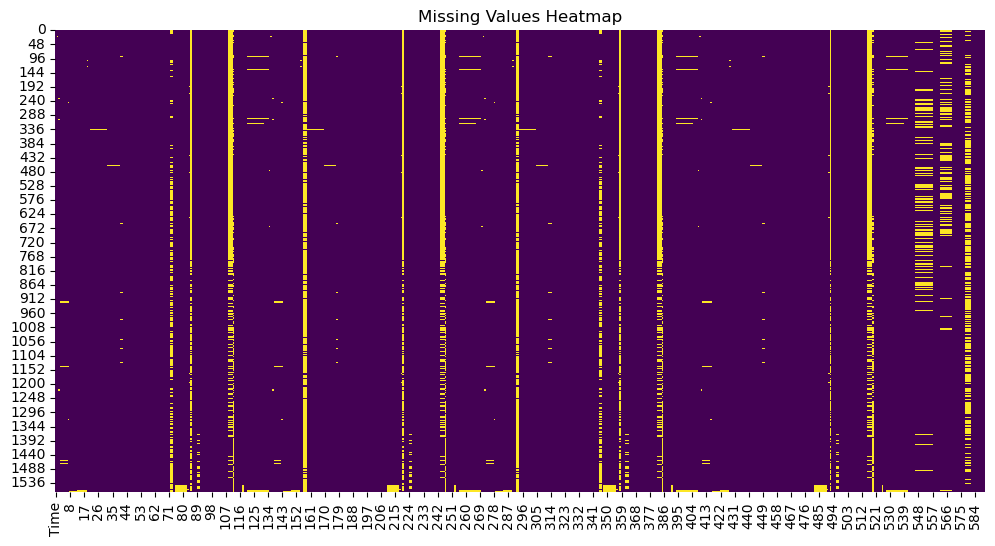

In [17]:
# Visualize Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

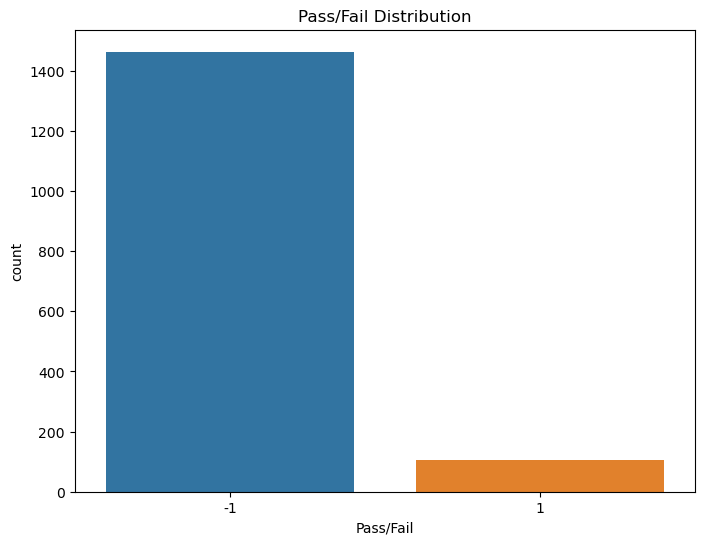

In [18]:
# Distribution of Pass/Fail
plt.figure(figsize=(8, 6))
sns.countplot(x='Pass/Fail', data=data)
plt.title('Pass/Fail Distribution')
plt.show()

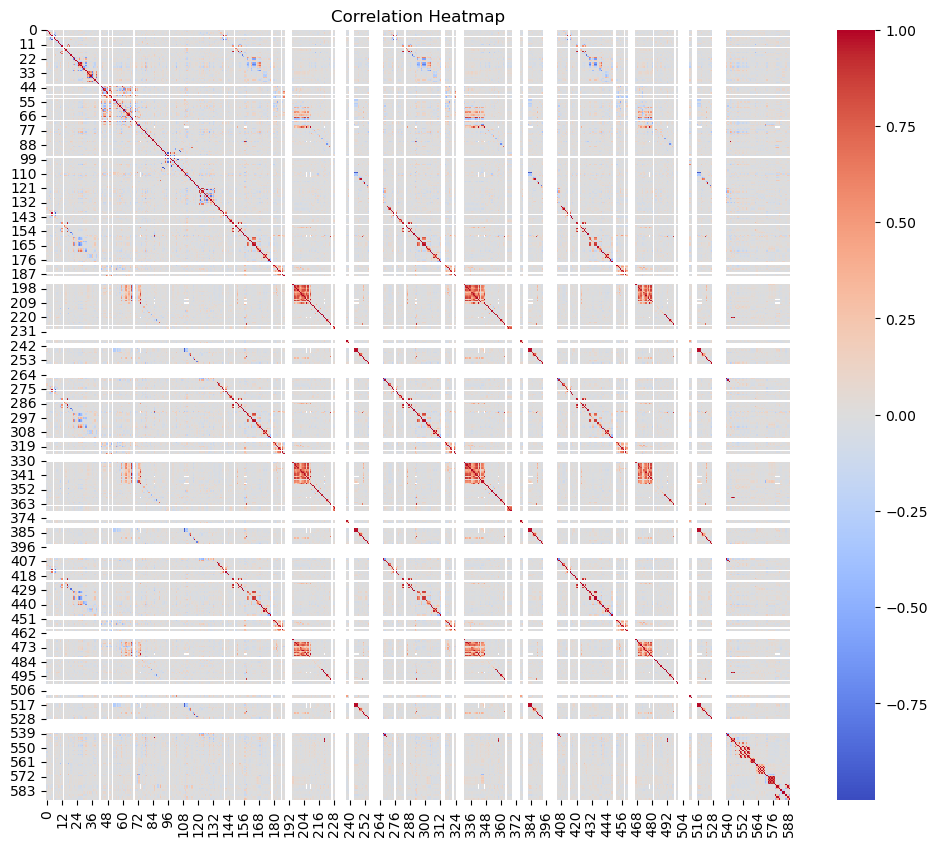

In [19]:
# Correlation Matrix (Exclude non-numeric columns like 'Time' and 'Pass/Fail')
numeric_data = data.drop(columns=['Time', 'Pass/Fail'])  # Remove non-numeric columns

# Now compute the correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Visualize Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

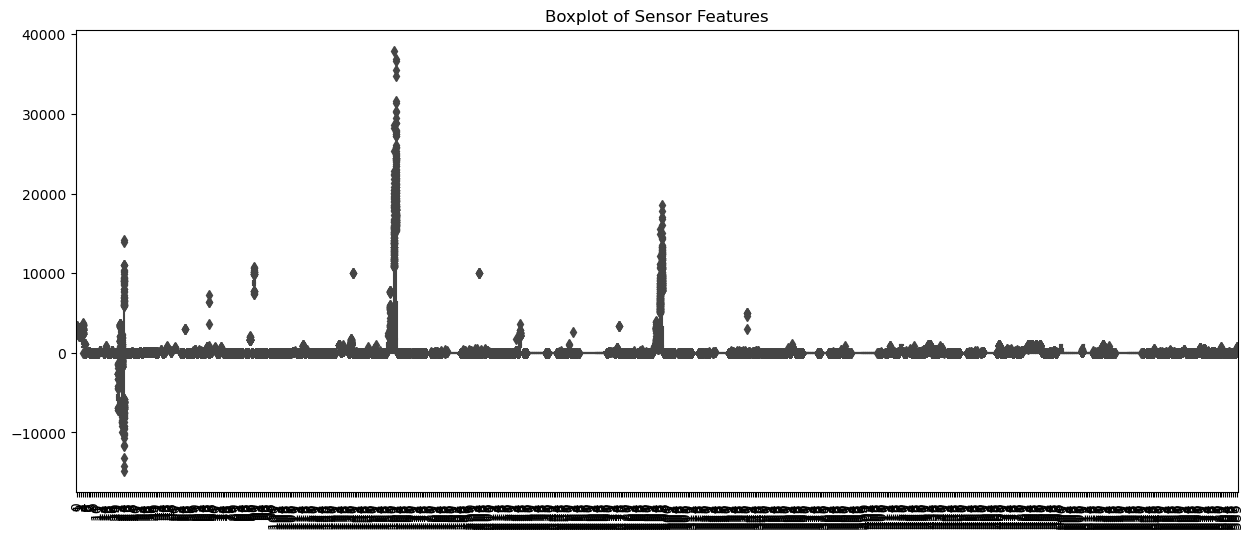

In [20]:
# Boxplot of Sensor Data (for outliers)
plt.figure(figsize=(15, 6))
sns.boxplot(data=data.drop(columns=['Pass/Fail', 'Time']))
plt.xticks(rotation=90)
plt.title('Boxplot of Sensor Features')
plt.show()



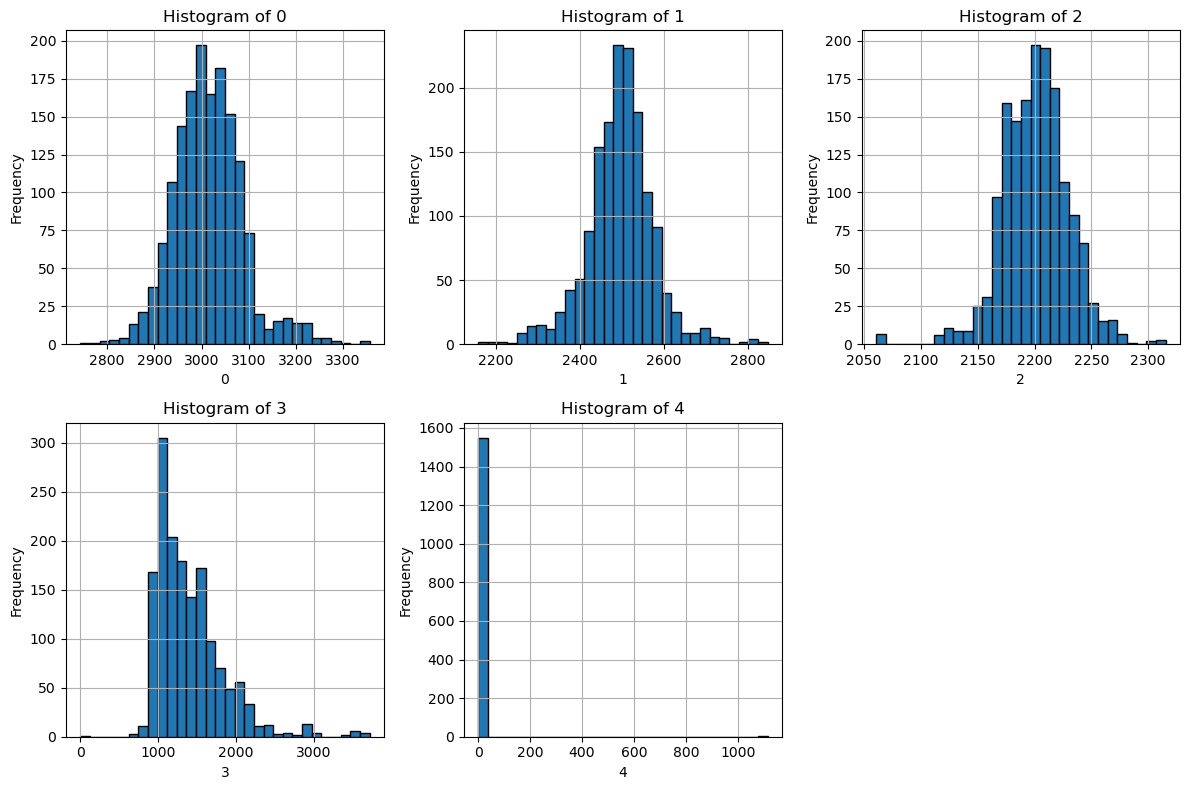

In [21]:
import matplotlib.pyplot as plt
data1=data.drop(columns=['Pass/Fail', 'Time'])
# Choose 5 columns from your dataset for histograms
columns_to_plot = data1.columns[:5]  

# Plot histograms for the selected columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for up to 6 plots
    data[column].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
# Function to identify outliers
def find_outliers_iqr(df):
    outlier_columns = {}

    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Check only numerical columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
            if not outliers.empty:
                outlier_columns[column] = outliers

    return outlier_columns

# Identify outlier columns
outlier_columns = find_outliers_iqr(data)

# Display outlier columns and their counts
for column, outliers in outlier_columns.items():
    print(f"Column: {column}, Outliers Count: {len(outliers)}")


Column: 0, Outliers Count: 50
Column: 1, Outliers Count: 86
Column: 2, Outliers Count: 31
Column: 3, Outliers Count: 51
Column: 4, Outliers Count: 48
Column: 6, Outliers Count: 98
Column: 7, Outliers Count: 12
Column: 8, Outliers Count: 6
Column: 9, Outliers Count: 26
Column: 10, Outliers Count: 30
Column: 11, Outliers Count: 8
Column: 12, Outliers Count: 12
Column: 14, Outliers Count: 11
Column: 15, Outliers Count: 7
Column: 16, Outliers Count: 35
Column: 17, Outliers Count: 16
Column: 18, Outliers Count: 12
Column: 19, Outliers Count: 46
Column: 20, Outliers Count: 29
Column: 21, Outliers Count: 36
Column: 22, Outliers Count: 53
Column: 23, Outliers Count: 194
Column: 24, Outliers Count: 119
Column: 25, Outliers Count: 39
Column: 26, Outliers Count: 39
Column: 27, Outliers Count: 24
Column: 28, Outliers Count: 5
Column: 29, Outliers Count: 11
Column: 30, Outliers Count: 12
Column: 31, Outliers Count: 354
Column: 32, Outliers Count: 27
Column: 33, Outliers Count: 54
Column: 34, Outlie

In [23]:
# Removing outliers
for column in outlier_columns.keys():
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [24]:
# Impute missing values (NaNs) using the mean of each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

In [25]:
# Step 3: Standardize the Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [26]:
# Select top 40 features using ANOVA F-test
selector = SelectKBest(f_classif, k=40)
features_selected = selector.fit_transform(features_scaled, labels)

c:\Users\gokil\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\gokil\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [27]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(features_selected, labels, test_size=0.2, random_state=42)

In [1]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'